In [54]:
#Import Tweet.csv
import pandas as pd
import numpy as np
df = pd.read_csv('Tweets.csv')
#Print first 5 lines
print(df.head(5))
#List Column & Format
print(df.dtypes)
print(len(df))



             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

                   tweet_id
airline_sentiment          
negative               9178
neutral                3099
positive               2363


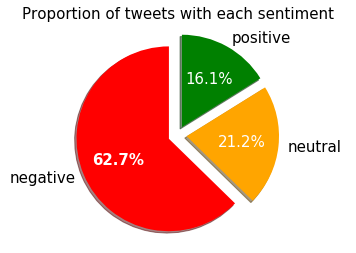

In [55]:
#proportion of tweets with each sentiment
prop_tweet=pd.pivot_table(df,index=["airline_sentiment"],values=["tweet_id"],aggfunc="count") 

print(prop_tweet)

#Create Pie Chart
import matplotlib.pyplot as plt
%matplotlib inline
color=("red","orange","green")
explode=(0.1, 0.1, 0.1)
labels=("negative","neutral","positive")
patches, texts, autotexts = plt.pie(prop_tweet['tweet_id'], explode=explode,autopct='%1.1f%%', labels=labels,shadow=True, startangle=90, colors=color)
plt.axis('equal')
plt.title('Proportion of tweets with each sentiment').set_fontsize(15)
autotexts[0].set_weight("bold")
autotexts[0].set_color("White")
autotexts[1].set_color("White")
autotexts[2].set_color("White")
autotexts[0].set_fontsize(15)
autotexts[1].set_fontsize(15)
autotexts[2].set_fontsize(15)
texts[0].set_fontsize(15)
texts[1].set_fontsize(15)
texts[2].set_fontsize(15)
plt.show()




                tweet_id
airline                 
American            2759
Delta               2222
Southwest           2420
US Airways          2913
United              3822
Virgin America       504


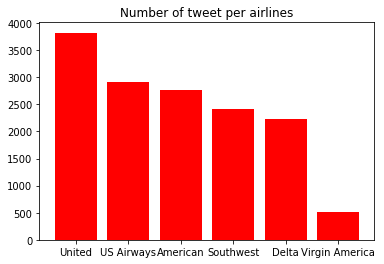

In [56]:
#Number of tweet per airlines
nb_tweet=pd.pivot_table(df,index=["airline"],values=["tweet_id"],aggfunc="count",) #how do you give a name to the name variable?"

nb_tweet_sort = nb_tweet.sort_values(by='tweet_id', ascending=False)
print(nb_tweet)
#Create barchart
objects = list(nb_tweet_sort.index)
x_pos = np.arange(len(objects))
plt.bar(x_pos,nb_tweet_sort['tweet_id'], align='center', color='red', alpha=1)  # alpha just controls the opacity

plt.title('Number of tweet per airlines')
plt.xticks(x_pos, objects)
plt.show()
  

airline         airline_sentiment
American        negative             71.040232
                neutral              16.781443
                positive             12.178325
Delta           negative             42.979298
                neutral              32.538254
                positive             24.482448
Southwest       negative             49.008264
                neutral              27.438017
                positive             23.553719
US Airways      negative             77.686234
                neutral              13.079300
                positive              9.234466
United          negative             68.890633
                neutral              18.236525
                positive             12.872841
Virgin America  negative             35.912698
                neutral              33.928571
                positive             30.158730
Name: tweet_id, dtype: float64
airline         airline_sentiment
American        negative             1960
             

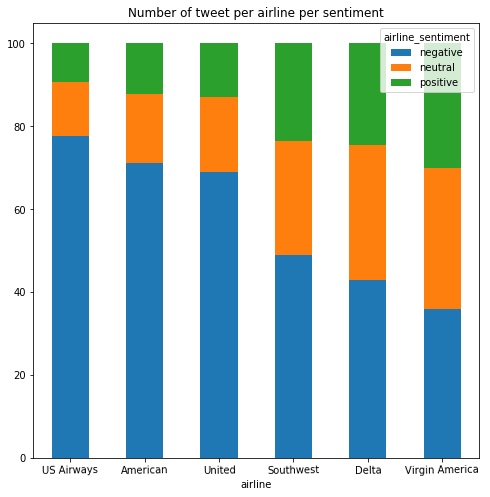

In [58]:
#Number of tweet per airlines per sentiment
df_trunc1=df[['airline','airline_sentiment','tweet_id']]
nb_tweet_air=df_trunc1.groupby(['airline','airline_sentiment'])['tweet_id'].count()

# Change: groupby airline and divide by sum
air_tweet_pcts = nb_tweet_air.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
print(air_tweet_pcts)

nb_tweet_sort = nb_tweet.sort_values(by='tweet_id', ascending=False)

#how do you give a name to the name variable?"
print(nb_tweet_air)
print(nb_tweet_air.dtypes)
print(len(nb_tweet_air))

air_tweet_pcts.unstack().sort_values(by='negative',ascending=False).plot(kind='bar',stacked=True,rot=1,figsize=(8,8),title='Number of tweet per airline per sentiment')

plt.show()

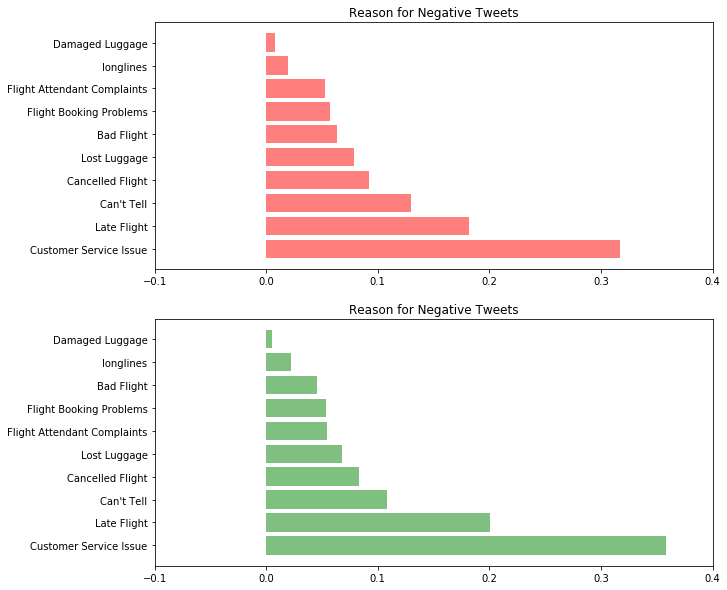

In [39]:
#Reason of negative tweet

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)

'''***********************
    TOTAL AIRLINES
**********************'''

#Keep only negative tweet
neg_tweet_1=df.ix[lambda df: df['airline_sentiment'] == "negative" , :]

#pivot reason for negative tweet
neg_tweet=pd.pivot_table(neg_tweet_1,index=["negativereason"],values=["tweet_id"],aggfunc="count",) 

neg_tweet['perc']= neg_tweet['tweet_id']/neg_tweet['tweet_id'].sum()


# Change: groupby airline and divide by sum

neg_tweet_sort = neg_tweet.sort_values(by='tweet_id', ascending=False)

#Create horizontal barchart
objects = list(neg_tweet_sort.index)
y_pos = np.arange(len(objects))
plt.barh(y_pos,neg_tweet_sort['perc'], align='center', color='red', alpha=.5)  # alpha just controls the opacity
plt.xlim([-0.1, 0.4])
plt.title('Reason for Negative Tweets')
plt.yticks(y_pos, objects)

'''***********************
    TOTAL US AIRWAYS
**********************'''
plt.subplot(2, 1, 2)
#Keep only negative tweet
neg_tweet_us=neg_tweet_1.ix[lambda neg_tweet: neg_tweet['airline'] == "US Airways" , :]

#pivot reason for negative tweet
neg_tweet_us=pd.pivot_table(neg_tweet_us,index=["negativereason"],values=["tweet_id"],aggfunc="count",) 

neg_tweet_us['perc']= neg_tweet_us['tweet_id']/neg_tweet_us['tweet_id'].sum()

# Change: groupby airline and divide by sum

neg_tweet_us_sort = neg_tweet_us.sort_values(by='tweet_id', ascending=False)

#Create horizontal barchart
objects = list(neg_tweet_us_sort.index)
y_pos = np.arange(len(objects))
plt.barh(y_pos,neg_tweet_us_sort['perc'], align='center', color='green', alpha=.5)  # alpha just controls the opacity
plt.xlim([-0.1, 0.4])
plt.title('Reason for Negative Tweets')
plt.yticks(y_pos, objects)
plt.show()

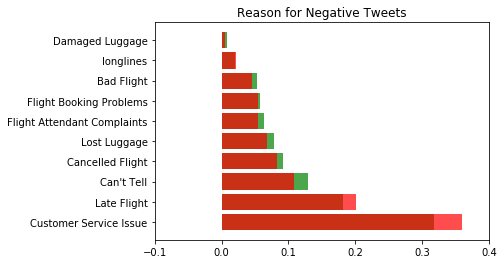

In [51]:

'''***********************
    TOTAL AIRLINES
**********************'''

#Keep only negative tweet
neg_tweet_1=df.ix[lambda df: df['airline_sentiment'] == "negative" , :]

#pivot reason for negative tweet
neg_tweet=pd.pivot_table(neg_tweet_1,index=["negativereason"],values=["tweet_id"],aggfunc="count",) 

neg_tweet['perc']= neg_tweet['tweet_id']/neg_tweet['tweet_id'].sum()


# Change: groupby airline and divide by sum

neg_tweet_sort = neg_tweet.sort_values(by='tweet_id', ascending=False)

#Create horizontal barchart
objects = list(neg_tweet_sort.index)
y_pos = np.arange(len(objects))
plt.barh(y_pos,neg_tweet_sort['perc'], align='center', color='green', alpha=.7)  # alpha just controls the opacity
plt.xlim([-0.1, 0.4])
plt.yticks(y_pos, objects)

'''***********************
    TOTAL US AIRWAYS
**********************'''
#Keep only negative tweet
neg_tweet_us=neg_tweet_1.ix[lambda neg_tweet: neg_tweet['airline'] == "US Airways" , :]

#pivot reason for negative tweet
neg_tweet_us=pd.pivot_table(neg_tweet_us,index=["negativereason"],values=["tweet_id"],aggfunc="count",) 

neg_tweet_us['perc']= neg_tweet_us['tweet_id']/neg_tweet_us['tweet_id'].sum()

# Change: groupby airline and divide by sum

neg_tweet_us_sort = neg_tweet_us.sort_values(by='tweet_id', ascending=False)

#Create horizontal barchart
objects = list(neg_tweet_us_sort.index)
y_pos = np.arange(len(objects))
plt.barh(y_pos,neg_tweet_us_sort['perc'], align='center', color='red', alpha=.7)  # alpha just controls the opacity
plt.xlim([-0.1, 0.4])
plt.title('Reason for Negative Tweets')
plt.yticks(y_pos, objects)
plt.show()

In [ ]:
#